<!--NAVIGATION-->
< [Condition 1](Condition_1.ipynb) | [Contents](Contents.ipynb) | [Condition 3](Condition_3.ipynb) >

# 4. Condition 2: No Industry, Mine, or Landfill within 300 Meters from Wells
## 4.1 Introduction
For the second condition we first need to reclassify the `buildg` layer in such a way that the result is a Boolean map with True (1) for industry, mine, and landfill and False (0) for the other classes. Then we need to calculate the distance to the True pixels and finally calculate the pixels that are further than 300 m from industry, mine, and landfill.

## 4.2 Create a Boolean Raster with True for Industry, Mine, and Landfill, and False for Other Buildings

Let's first reclassify `buildg.map`. For reclassifications we use so called *Lookup tables*.
These lookup tables can be used by PCRaster witht the [`lookup...` operations](https://pcraster.geo.uu.nl/pcraster/4.3.0/documentation/pcraster_manual/sphinx/op_lookup.html). For these operations you need to know the data type of the output and use one of these operations:

| output data type | operation |
|:-------:|:-------:|
| boolean | `lookupboolean` |
| nominal | `lookupnominal` |
| ordinal | `lookupordinal` |
| scalar | `lookupscalar` |
| directional | `lookupdirectional` |
| ldd | `lookupldd` |

The general syntax is:
`Result = lookup<datatype>(lookuptable,input map)`

In our case we need to reclassify `buildg.map` to a boolean result, so the operation is `lookupboolean`.

In this case the table should be a text file with the following contents:

`0 0
 1 0
 2 0
 3 1
 4 1
 5 1`

You can prepare this text file in notepad or another plain text editor. You can give it any extension, but here we'll use `.tbl` so it's clear that it's a table. Here we'll use the one provided in the `data` folder: `industry.tbl`.

We can also reclassify ranges of values and use multiple input maps. We will look at that later.

Now we can use the `lookupboolean` operation.

Every new Jupyter notebook page we need to import the necessary libraries first. Here we import PCRaster.


In [1]:
from pcraster import *

Now we set the data folder.

In [2]:
os.chdir("./data")

Now we need to read `buildg.map` from disk. In each Jupyter notebook page we need to define the variables again.

In [5]:
Buildings = readmap("fbuildg.map")
#Buildings = nominal(Buildings) 

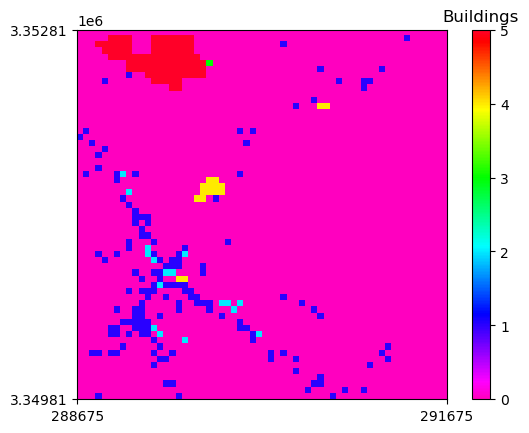

In [6]:
plot(Buildings)

Now let's apply the lookup table.

In [7]:
Industry = Buildings > 2
Industry = lookupboolean("industry.tbl", Buildings)

Visualise the result.

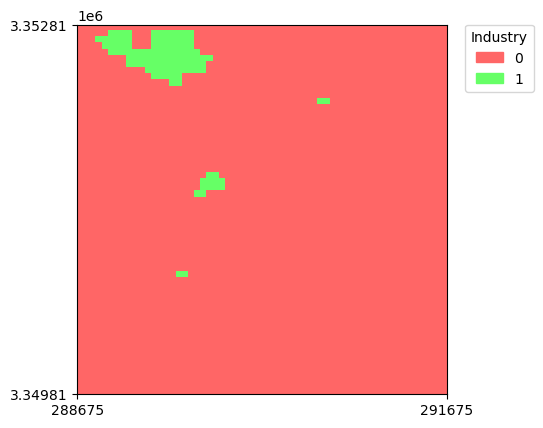

In [8]:
plot(Industry)

## 4.3 Create Zones of 300 Meters Around Industry, Mine, and Landfill
Now we have the industry pixels we can create a boolean map with True for pixels that are at least 300 m from industry and False for pixels that are closer than 300 m from industry.

Previously we used the `spreadmaxzone` operation. There is, however, no `spreadminzone` operation.
There are different ways to solve this:
1. We can use `spreadmaxzone` and invert the result by using the NOT operator `~`.
2. We can calculate all distances with the `spread` operation and use the `>=` operator to create the required boolean map.
3. We can use a lookup table reclassifying the ranges.

Method 1 is the fastest. Let's try that first.

In [9]:
IndustryMax300m = spreadmaxzone(Industry, 0, 1, 300)
IndustryMin300m = ~ IndustryMax300m

Visualise the result.

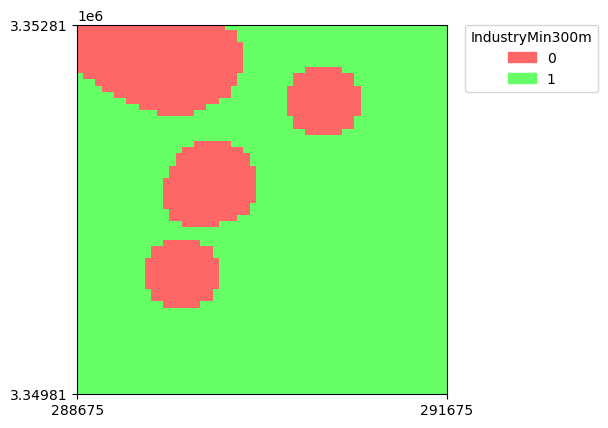

In [18]:
plot(IndustryMin300m)

Let's look also at the other methods and see if they give the same result.

Calculate the distances to Industry:

In [19]:
IndustryDistance = spread(Industry,0,1)

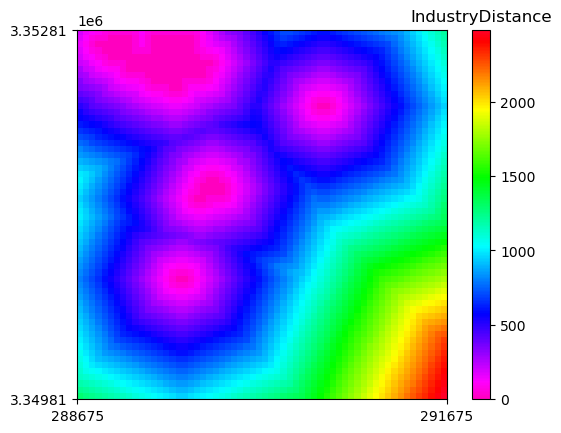

In [37]:
plot(IndustryDistance)

Create the boolean condition:

In [21]:
IndustryMin300m_2 = IndustryDistance >= 300

Visualise the result.

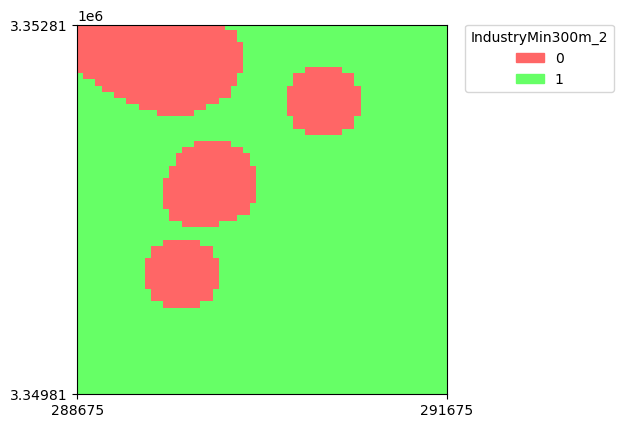

In [22]:
plot(IndustryMin300m_2)

For the third method we're going to use a lookup table with ranges. In the text file the first column containst the ranges and the second column the output values. `[` and `]` are used to include the value in the range and `<` and `>` are used to exclude the value in the range.

So here our text file looks like:

`<,300> 0
[300,> 1`

Where the first row means: all values < 300 get boolean zero. The second row means all values >= 300 get boolean 1.

We're going to reclassify `IndustryDistance` using the lookup table `industry300m.tbl` which is in the `data` folder. Write the code below and write the result to `IndustryMin300m_3`:

In [36]:
import pandas as pd

df = pd.read_csv("industry300m.tbl")
df

,<,300> 0
0,[300,> 1


In [39]:
IndustryMin300m_3=lookupboolean("industry300m.tbl", IndustryDistance)

Visualise the result.

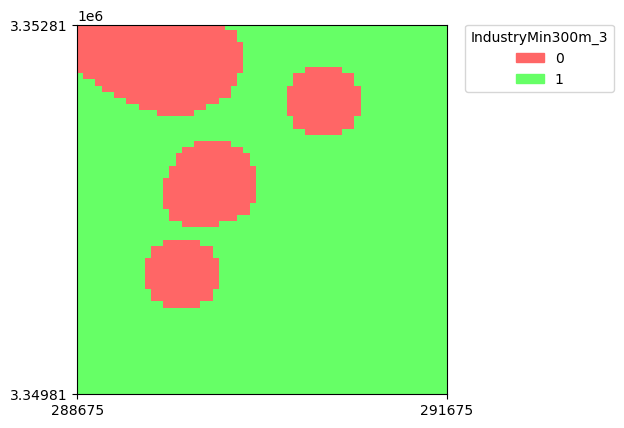

In [40]:
plot(IndustryMin300m_3)

You can see that the results are the same.
In GIS you often get to the same result in different ways. You need to find the most efficient route to the desired result.

Save the result as `ind300m.map`.

In [10]:
report(IndustryMin300m,"find300m.map")



<!--NAVIGATION-->
< [Condition 1](Condition_1.ipynb) | [Contents](Contents.ipynb) | [Condition 3](Condition_3.ipynb) >